# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [5]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [6]:
data.rename(columns = {'Diabetes_012':'Diabetes_02'}, inplace = True)

In [7]:
data=data[(data['Diabetes_02'] != 1.0)]

In [8]:
data = data.astype(int)
data = data[0:50000]

In [9]:
data['Diabetes_02'].value_counts()

0    42988
2     7012
Name: Diabetes_02, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 51077
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_02           50000 non-null  int32
 1   HighBP                50000 non-null  int32
 2   HighChol              50000 non-null  int32
 3   CholCheck             50000 non-null  int32
 4   BMI                   50000 non-null  int32
 5   Smoker                50000 non-null  int32
 6   Stroke                50000 non-null  int32
 7   HeartDiseaseorAttack  50000 non-null  int32
 8   PhysActivity          50000 non-null  int32
 9   Fruits                50000 non-null  int32
 10  Veggies               50000 non-null  int32
 11  HvyAlcoholConsump     50000 non-null  int32
 12  AnyHealthcare         50000 non-null  int32
 13  NoDocbcCost           50000 non-null  int32
 14  GenHlth               50000 non-null  int32
 15  MentHlth              50000 non-null  int32
 16  Phys

In [11]:
data.describe()

,Diabetes_02,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.280480,0.419080,0.417500,0.964500,27.805120,0.444040,0.041680,0.088900,0.777720,0.646640,...,0.947660,0.088980,2.483480,3.222220,4.229780,0.164280,0.440020,8.046360,5.102140,6.109780
std,0.694479,0.493413,0.493152,0.185042,6.082493,0.496864,0.199859,0.284602,0.415782,0.478018,...,0.222714,0.284718,1.081661,7.400663,8.662265,0.370533,0.496394,3.104797,1.001702,2.095055
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [12]:
data.corr()

,Diabetes_02,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_02,1.000000,0.273206,0.203633,0.060364,0.239887,0.055109,0.109439,0.168510,-0.125421,-0.042202,...,0.014743,0.030764,0.299096,0.067507,0.171073,0.225564,0.023274,0.176812,-0.135540,-0.165636
HighBP,0.273206,1.000000,0.292345,0.090880,0.236715,0.104553,0.133988,0.208396,-0.125114,-0.043051,...,0.035988,0.012032,0.302913,0.056752,0.162229,0.230024,0.051349,0.338368,-0.132697,-0.159549
HighChol,0.203633,0.292345,1.000000,0.077601,0.117946,0.086576,0.092925,0.172742,-0.087096,-0.045443,...,0.049094,0.005775,0.208482,0.062726,0.122402,0.144989,0.033790,0.263564,-0.056730,-0.069779
CholCheck,0.060364,0.090880,0.077601,1.000000,0.034529,-0.011927,0.018919,0.037141,0.005577,0.020980,...,0.123316,-0.065318,0.037590,-0.015329,0.030669,0.039262,-0.021984,0.083560,0.007585,0.024963
BMI,0.239887,0.236715,0.117946,0.034529,1.000000,0.013532,0.027494,0.064541,-0.160200,-0.094069,...,-0.016285,0.069028,0.261092,0.089071,0.131804,0.217682,0.047154,-0.035455,-0.135456,-0.116162
Smoker,0.055109,0.104553,0.086576,-0.011927,0.013532,1.000000,0.059742,0.107244,-0.087223,-0.065573,...,-0.016799,0.040783,0.148179,0.082187,0.108211,0.113053,0.090796,0.144360,-0.131272,-0.104758
Stroke,0.109439,0.133988,0.092925,0.018919,0.027494,0.059742,1.000000,0.211583,-0.078889,-0.018757,...,0.009021,0.038159,0.174065,0.076101,0.154715,0.181395,-0.004234,0.123685,-0.069318,-0.124802
HeartDiseaseorAttack,0.168510,0.208396,0.172742,0.037141,0.064541,0.107244,0.211583,1.000000,-0.087208,-0.021657,...,0.025449,0.030479,0.243436,0.074981,0.174924,0.208393,0.078304,0.210294,-0.077663,-0.126759
PhysActivity,-0.125421,-0.125114,-0.087096,0.005577,-0.160200,-0.087223,-0.078889,-0.087208,1.000000,0.138342,...,0.037429,-0.063031,-0.274149,-0.127047,-0.224960,-0.267197,0.039187,-0.082203,0.195215,0.193442
Fruits,-0.042202,-0.043051,-0.045443,0.020980,-0.094069,-0.065573,-0.018757,-0.021657,0.138342,1.000000,...,0.022968,-0.044806,-0.105015,-0.066140,-0.048298,-0.049967,-0.082917,0.061977,0.096303,0.073465


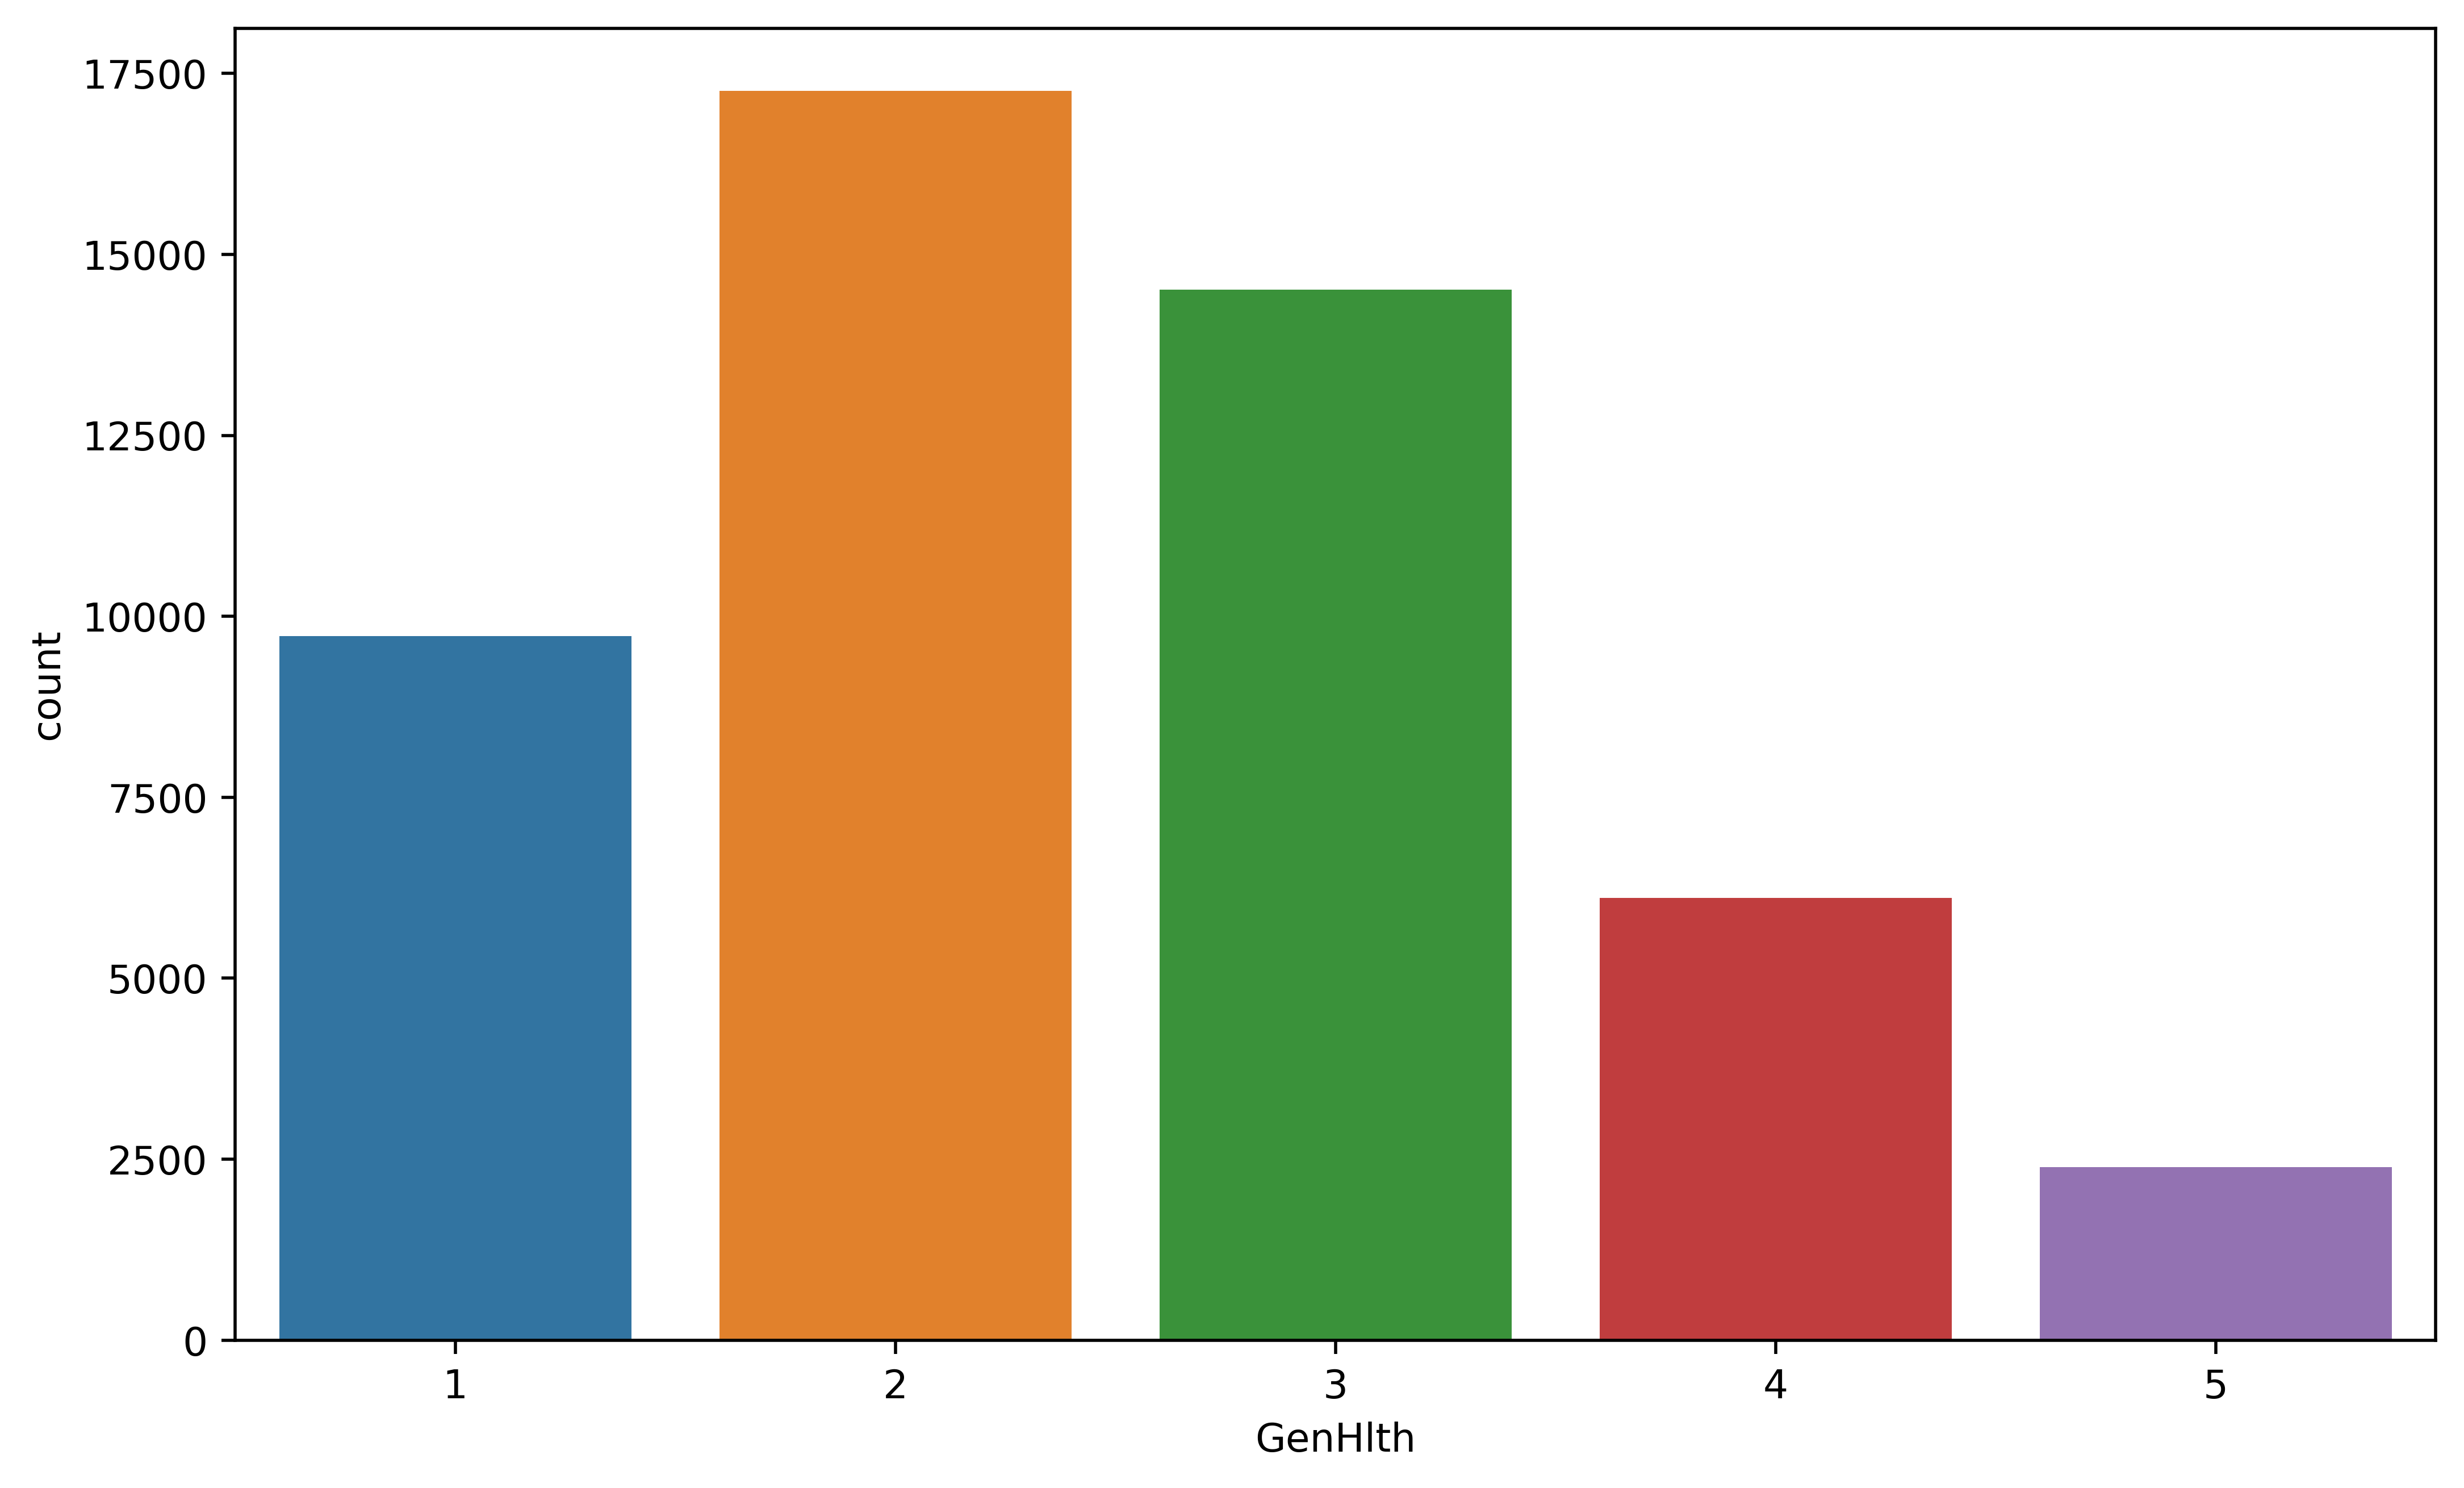

In [13]:
plt.figure(figsize=(10,6),dpi=500)
sns.countplot(data, x = "GenHlth");

In [13]:
f, ax = plt.subplots(1, figsize=(20,15),dpi=500)
sns.heatmap(data.corr(), annot=True);
f.savefig("output.png")

In [15]:
#set plot features
sns.set(style = 'darkgrid', color_codes = True) 
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)

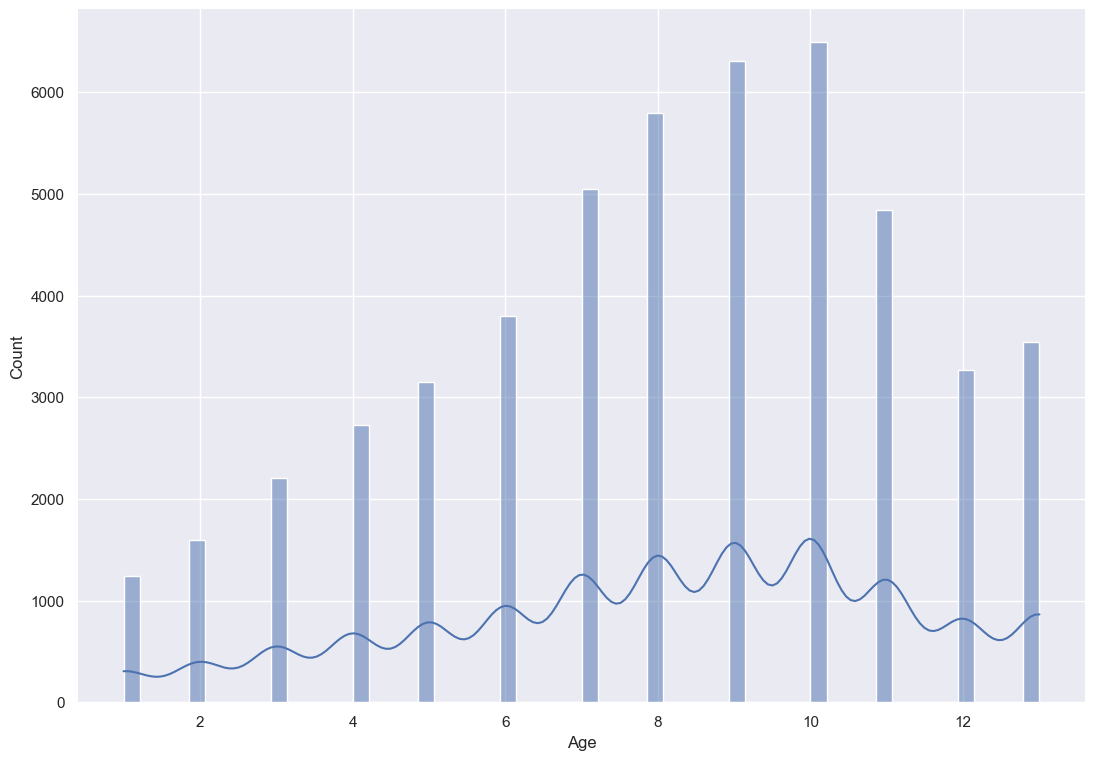

In [16]:
#create plot, a histogram of cost of living index
setPlt()
hist = sns.histplot(data['Age'],kde=True)

<Axes: xlabel='Diabetes_02', ylabel='count'>

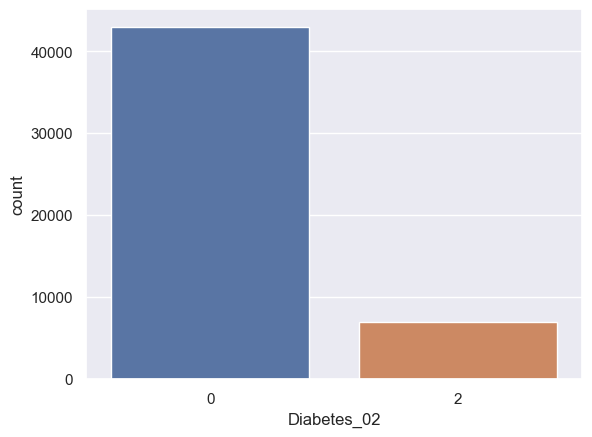

In [17]:
sns.countplot(x=data['Diabetes_02'],alpha=1)

In [18]:
data.count()

Diabetes_02             50000
HighBP                  50000
HighChol                50000
CholCheck               50000
BMI                     50000
Smoker                  50000
Stroke                  50000
HeartDiseaseorAttack    50000
PhysActivity            50000
Fruits                  50000
Veggies                 50000
HvyAlcoholConsump       50000
AnyHealthcare           50000
NoDocbcCost             50000
GenHlth                 50000
MentHlth                50000
PhysHlth                50000
DiffWalk                50000
Sex                     50000
Age                     50000
Education               50000
Income                  50000
dtype: int64

# FEature Selection

In [19]:
Y = data['Diabetes_02']
X = data.drop('Diabetes_02',axis=1)

In [20]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51073,0,1,1,43,0,0,0,1,1,1,...,1,0,3,0,0,0,0,11,4,5
51074,0,1,1,22,0,0,0,0,1,0,...,1,0,5,0,30,1,0,11,6,3
51075,1,1,1,24,1,0,1,0,1,1,...,1,1,5,28,30,0,1,9,5,7
51076,1,0,1,47,0,0,0,1,1,1,...,1,0,4,30,10,1,1,6,6,3


In [21]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
51073    0
51074    0
51075    0
51076    2
51077    2
Name: Diabetes_02, Length: 50000, dtype: int32

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [25]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth =3, random_state = 42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [27]:
evaluate(DT,X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[33369   990]
 [ 4576  1065]]
ACCURACY SCORE:
0.8609
CLASSIFICATION REPORT:
                      0            2  accuracy     macro avg  weighted avg
precision      0.879404     0.518248   0.86085      0.698826      0.828472
recall         0.971187     0.188796   0.86085      0.579991      0.860850
f1-score       0.923019     0.276767   0.86085      0.599893      0.831882
support    34359.000000  5641.000000   0.86085  40000.000000  40000.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[8375  254]
 [1086  285]]
ACCURACY SCORE:
0.8660
CLASSIFICATION REPORT:
                     0            2  accuracy     macro avg  weighted avg
precision     0.885213     0.528757     0.866      0.706985      0.836343
recall        0.970564     0.207877     0.866      0.589221      0.866000
f1-score      0.925926     0.298429     0.866      0.612178      0.839896
support    8629.000000  1371.000000     0.866  10000.000000  10000.000000


In [28]:
y_pred = DT.predict(X_test)
a = accuracy_score(y_test, y_pred) * 100
p = precision_score(y_test,y_pred,average='macro') * 100 
r = recall_score(y_test,y_pred,average='macro') * 100


In [29]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(DT, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.861125 0.85525  0.8605   0.863625 0.85975 ]
Average score: 0.86


# SVM

In [30]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [31]:
evaluate(SVM,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[34331    28]
 [ 5602    39]]
ACCURACY SCORE:
0.8592
CLASSIFICATION REPORT:
                      0            2  accuracy     macro avg  weighted avg
precision      0.859715     0.582090   0.85925      0.720902      0.820563
recall         0.999185     0.006914   0.85925      0.503049      0.859250
f1-score       0.924218     0.013665   0.85925      0.468941      0.795807
support    34359.000000  5641.000000   0.85925  40000.000000  40000.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[8622    7]
 [1362    9]]
ACCURACY SCORE:
0.8631
CLASSIFICATION REPORT:
                     0            2  accuracy     macro avg  weighted avg
precision     0.863582     0.562500    0.8631      0.713041      0.822303
recall        0.999189     0.006565    0.8631      0.502877      0.863100
f1-score      0.926449     0.012978    0.8631      0.469713      0.801212
support    8629.000000  1371.000000    0.8631  10000.000000  10000.000000


In [32]:
y_pred = SVM.predict(X_test)
a1 = accuracy_score(y_test, y_pred) * 100
p1 = precision_score(y_test,y_pred,average='macro') * 100 
r1 = recall_score(y_test,y_pred,average='macro') * 100


In [33]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(SVM, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.858375 0.85525  0.86125  0.863625 0.856375]
Average score: 0.86


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
evaluate(RF,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[34350     9]
 [   79  5562]]
ACCURACY SCORE:
0.9978
CLASSIFICATION REPORT:
                      0            2  accuracy     macro avg  weighted avg
precision      0.997705     0.998384    0.9978      0.998045      0.997801
recall         0.999738     0.985995    0.9978      0.992867      0.997800
f1-score       0.998721     0.992151    0.9978      0.995436      0.997794
support    34359.000000  5641.000000    0.9978  40000.000000  40000.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[8385  244]
 [1117  254]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                     0            2  accuracy     macro avg  weighted avg
precision     0.882446     0.510040    0.8639      0.696243      0.831389
recall        0.971723     0.185266    0.8639      0.578495      0.863900
f1-score      0.924935     0.271803    0.8639      0.598369      0.835391
support    8629.000000  1371.000000    0.8639  10000.000000  10000.000000


In [36]:
y_pred = RF.predict(X_test)
a2 = accuracy_score(y_test, y_pred) * 100
p2 = precision_score(y_test,y_pred,average='macro') * 100 
r2 = recall_score(y_test,y_pred,average='macro') * 100


In [37]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(RF, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.859375 0.860625 0.86075  0.863875 0.859375]
Average score: 0.86


# Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [39]:
evaluate(NB,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[28024  6335]
 [ 2450  3191]]
ACCURACY SCORE:
0.7804
CLASSIFICATION REPORT:
                      0            2  accuracy     macro avg  weighted avg
precision      0.919604     0.334978  0.780375      0.627291      0.837157
recall         0.815623     0.565680  0.780375      0.690652      0.780375
f1-score       0.864498     0.420782  0.780375      0.642640      0.801923
support    34359.000000  5641.000000  0.780375  40000.000000  40000.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[6987 1642]
 [ 584  787]]
ACCURACY SCORE:
0.7774
CLASSIFICATION REPORT:
                     0            2  accuracy     macro avg  weighted avg
precision     0.922864     0.324002    0.7774      0.623433      0.840760
recall        0.809711     0.574034    0.7774      0.691872      0.777400
f1-score      0.862593     0.414211    0.7774      0.638402      0.801119
support    8629.000000  1371.000000    0.7774  10000.000000  10000.000000


In [40]:
y_pred = NB.predict(X_test)
a3 = accuracy_score(y_test, y_pred) * 100
p3 = precision_score(y_test,y_pred,average='macro') * 100 
r3 = recall_score(y_test,y_pred,average='macro') * 100


In [41]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(NB, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.780625 0.77825  0.7815   0.77725  0.7835  ]
Average score: 0.78


# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
evaluate(KNN,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[33414   945]
 [ 2988  2653]]
ACCURACY SCORE:
0.9017
CLASSIFICATION REPORT:
                      0            2  accuracy     macro avg  weighted avg
precision      0.917917     0.737354  0.901675      0.827635      0.892453
recall         0.972496     0.470307  0.901675      0.721401      0.901675
f1-score       0.944419     0.574305  0.901675      0.759362      0.892223
support    34359.000000  5641.000000  0.901675  40000.000000  40000.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[8097  532]
 [1060  311]]
ACCURACY SCORE:
0.8408
CLASSIFICATION REPORT:
                     0            2  accuracy     macro avg  weighted avg
precision     0.884242     0.368921    0.8408      0.626581      0.813591
recall        0.938347     0.226842    0.8408      0.582595      0.840800
f1-score      0.910491     0.280939    0.8408      0.595715      0.824180
support    8629.000000  1371.000000    0.8408  10000.000000  10000.000000


In [44]:
y_pred = KNN.predict(X_test)
a4 = accuracy_score(y_test, y_pred) * 100
p4 = precision_score(y_test,y_pred,average='macro') * 100 
r4 = recall_score(y_test,y_pred,average='macro') * 100


In [45]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(KNN, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.835125 0.833125 0.839125 0.84325  0.83275 ]
Average score: 0.84


# Voting Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = GaussianNB()
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('nb', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('dt', DecisionTreeClassifier())])

In [47]:
evaluate(eclf1,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[34356     3]
 [  104  5537]]
ACCURACY SCORE:
0.9973
CLASSIFICATION REPORT:
                      0            2  accuracy     macro avg  weighted avg
precision      0.996982     0.999458  0.997325      0.998220      0.997331
recall         0.999913     0.981564  0.997325      0.990738      0.997325
f1-score       0.998445     0.990430  0.997325      0.994438      0.997315
support    34359.000000  5641.000000  0.997325  40000.000000  40000.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[7978  651]
 [ 944  427]]
ACCURACY SCORE:
0.8405
CLASSIFICATION REPORT:
                     0            2  accuracy     macro avg  weighted avg
precision     0.894194     0.396104    0.8405      0.645149      0.825906
recall        0.924557     0.311451    0.8405      0.618004      0.840500
f1-score      0.909122     0.348714    0.8405      0.628918      0.832290
support    8629.000000  1371.000000    0.8405  10000.000000  10000.000000


In [48]:
y_pred = eclf1.predict(X_test)
a5 = accuracy_score(y_test, y_pred) * 100
p5 = precision_score(y_test,y_pred,average='macro') * 100 
r5 = recall_score(y_test,y_pred,average='macro') * 100


In [49]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=5)

score = cross_val_score(eclf1, X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83925  0.84025  0.8445   0.841    0.839625]
Average score: 0.84


# ANN

In [50]:
# Define the ANN model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, input_dim=21, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy',f1_score,recall_m,precision_m])

# Train the model
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 [==============================] - 12s 5ms/step - loss: 0.3883 - accuracy: 0.7181 - f1_score: 0.6218 - recall_m: 0.8108 - precision_m: 0.5640 - val_loss: 0.3341 - val_accuracy: 0.7160 - val_f1_score: 0.5973 - val_recall_m: 0.8157 - val_precision_m: 0.5078
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3389 - accuracy: 0.7290 - f1_score: 0.6276 - recall_m: 0.8022 - precision_m: 0.5669 - val_loss: 0.3057 - val_accuracy: 0.7405 - val_f1_score: 0.6775 - val_recall_m: 0.8429 - val_precision_m: 0.6240
Epoch 3/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3006 - accuracy: 0.7429 - f1_score: 0.6619 - recall_m: 0.7971 - precision_m: 16000.5996 - val_loss: 0.2600 - val_accuracy: 0.7646 - val_f1_score: 0.7356 - val_recall_m: 0.8259 - val_precision_m: 0.7553
Epoch 4/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.2383 - accuracy: 0.7553 - f1_score: 0.7163 - recall_m: 0.8159 - precision_m: 40000.5000 -

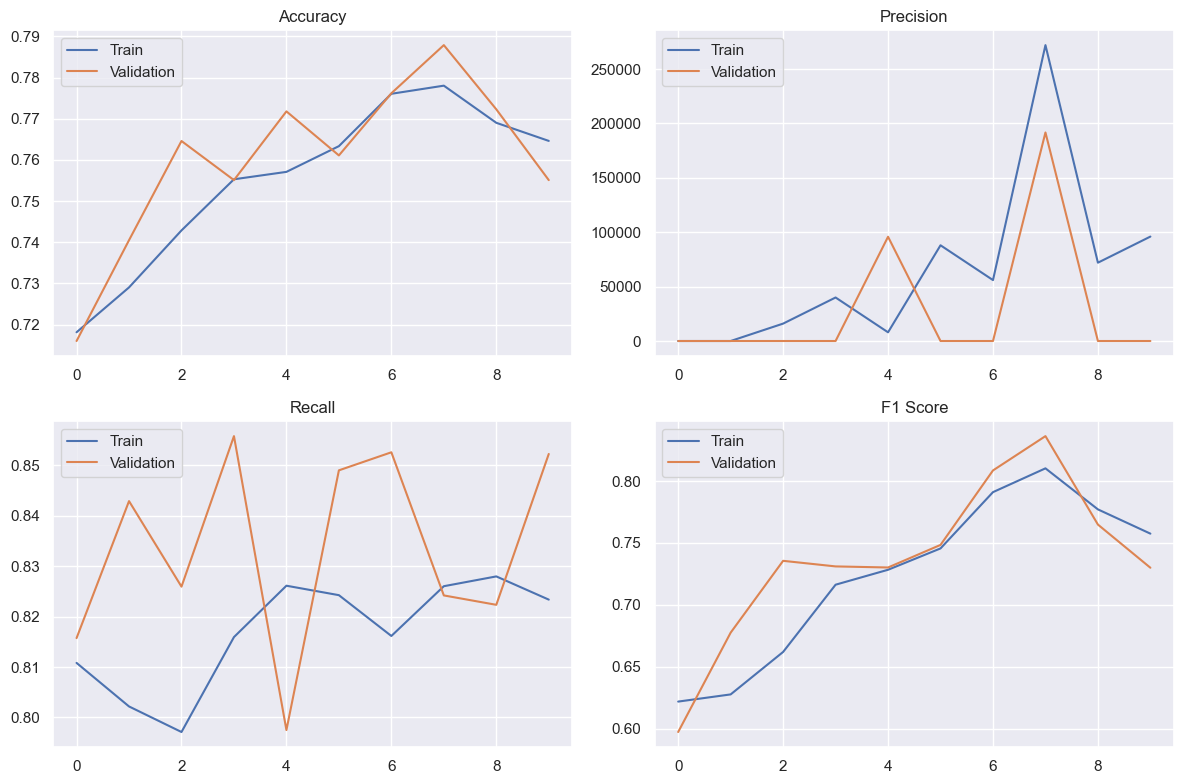

In [51]:
history = hist
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [52]:
predicted_labels =np.argmax(model.predict(X_test), axis=-1)
true_labels = np.array(y_test)

a6 = accuracy_score(true_labels, predicted_labels) * 100
p6 = precision_score(true_labels, predicted_labels,average='macro') * 100 
r6= recall_score(true_labels, predicted_labels,average='macro') * 100


313/313 [==============================] - 1s 2ms/step


# CNN

In [53]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(21,))) # FC Fully Connected Layer, input_dimension is dataset input parameters
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(1, activation='sigmoid'))

In [54]:
# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy',f1_score,recall_m,precision_m])

# Train the model
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 [==============================] - 15s 10ms/step - loss: 0.3848 - accuracy: 0.7237 - f1_score: 0.6600 - recall_m: 0.8186 - precision_m: 680000.0000 - val_loss: 0.3258 - val_accuracy: 0.7170 - val_f1_score: 0.6107 - val_recall_m: 0.8287 - val_precision_m: 0.5280
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3069 - accuracy: 0.7455 - f1_score: 0.6762 - recall_m: 0.7999 - precision_m: 32000.3652 - val_loss: 0.1636 - val_accuracy: 0.7445 - val_f1_score: 0.6935 - val_recall_m: 0.8440 - val_precision_m: 0.6595
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: -0.1823 - accuracy: 0.7637 - f1_score: 0.7446 - recall_m: 0.8040 - precision_m: 96000.4375 - val_loss: -1.3487 - val_accuracy: 0.7528 - val_f1_score: 0.7138 - val_recall_m: 0.8462 - val_precision_m: 0.6969
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: -4.9737 - accuracy: 0.7563 - f1_score: 0.7180 - recall_m: 0.8096 - precision_m:

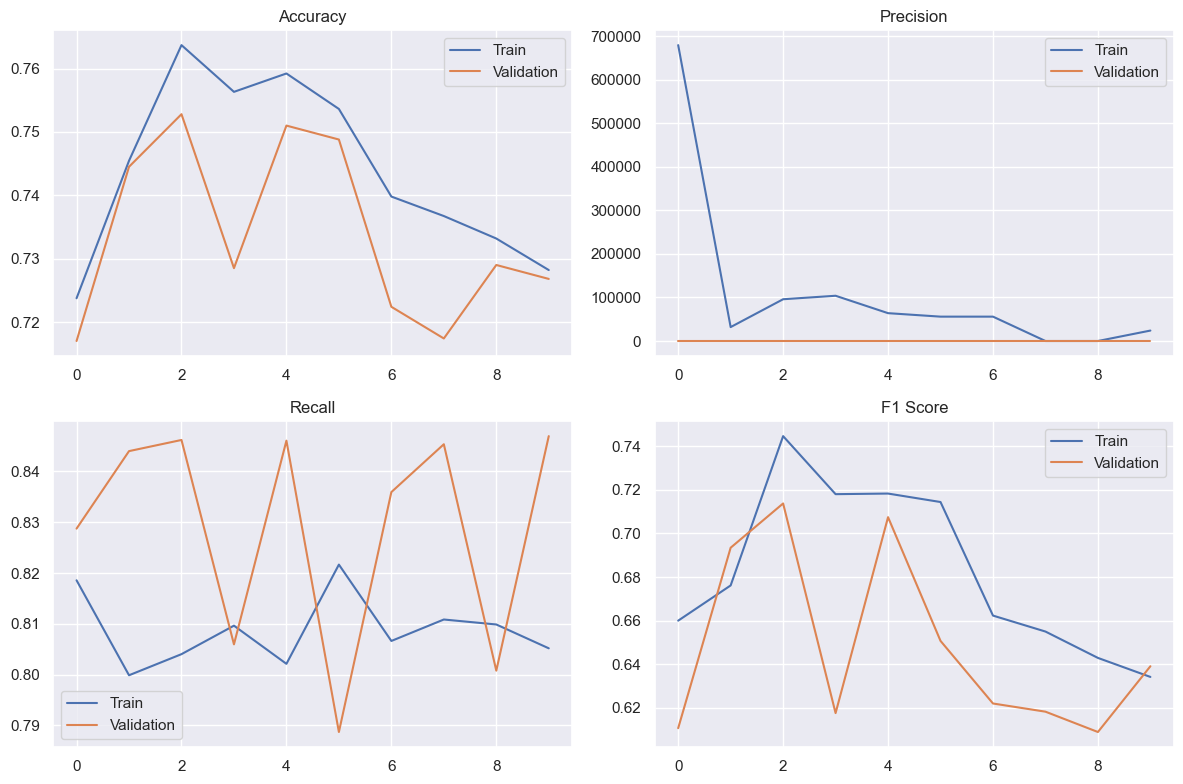

In [55]:
history = hist
train_acc = history.history['accuracy']
train_recall = history.history['recall_m']
train_precision = history.history['precision_m']
train_f1 = history.history['f1_score']
val_acc = history.history['val_accuracy']
val_recall = history.history['val_recall_m']
val_precision = history.history['val_precision_m']
val_f1 = history.history['val_f1_score']

# Create a figure and subplot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
axs[0, 0].plot(train_acc, label='Train')
axs[0, 0].plot(val_acc, label='Validation')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

# Plot precision
axs[0, 1].plot(train_precision, label='Train')
axs[0, 1].plot(val_precision, label='Validation')
axs[0, 1].set_title('Precision')
axs[0, 1].legend()

# Plot recall
axs[1, 0].plot(train_recall, label='Train')
axs[1, 0].plot(val_recall, label='Validation')
axs[1, 0].set_title('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].plot(train_f1, label='Train')
axs[1, 1].plot(val_f1, label='Validation')
axs[1, 1].set_title('F1 Score')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [56]:
predicted_labels = np.argmax(model.predict(X_test), axis=-1)
true_labels = np.array(y_test)

a7 = accuracy_score(true_labels, predicted_labels) * 100
p7 = precision_score(true_labels, predicted_labels,average='macro') * 100 
r7= recall_score(true_labels, predicted_labels,average='macro') * 100


313/313 [==============================] - 1s 3ms/step


# Comparison

In [57]:
results ={'Accuracy': [a,a1,a2,a3,a4,a5,a6,a7],
 'Recall':[r,r1,r2,r3,r4,r5,r6 ,r7],
 'Precision': [p,p1,p2,p3,p4,p5,p6,p7]}
index = ['DT','RF','SVM','NB','KNN','Voting Classifier','ANN','CNN']

In [58]:
results =pd.DataFrame(results,index=index)

In [59]:
print(results)

                   Accuracy     Recall  Precision
DT                    86.60  58.922092  70.698497
RF                    86.31  50.287667  71.304087
SVM                   86.39  57.849474  69.624298
NB                    77.74  69.187250  62.343260
KNN                   84.08  58.259458  62.658104
Voting Classifier     84.05  61.800411  64.514901
ANN                   86.29  50.000000  43.145000
CNN                   86.29  50.000000  43.145000


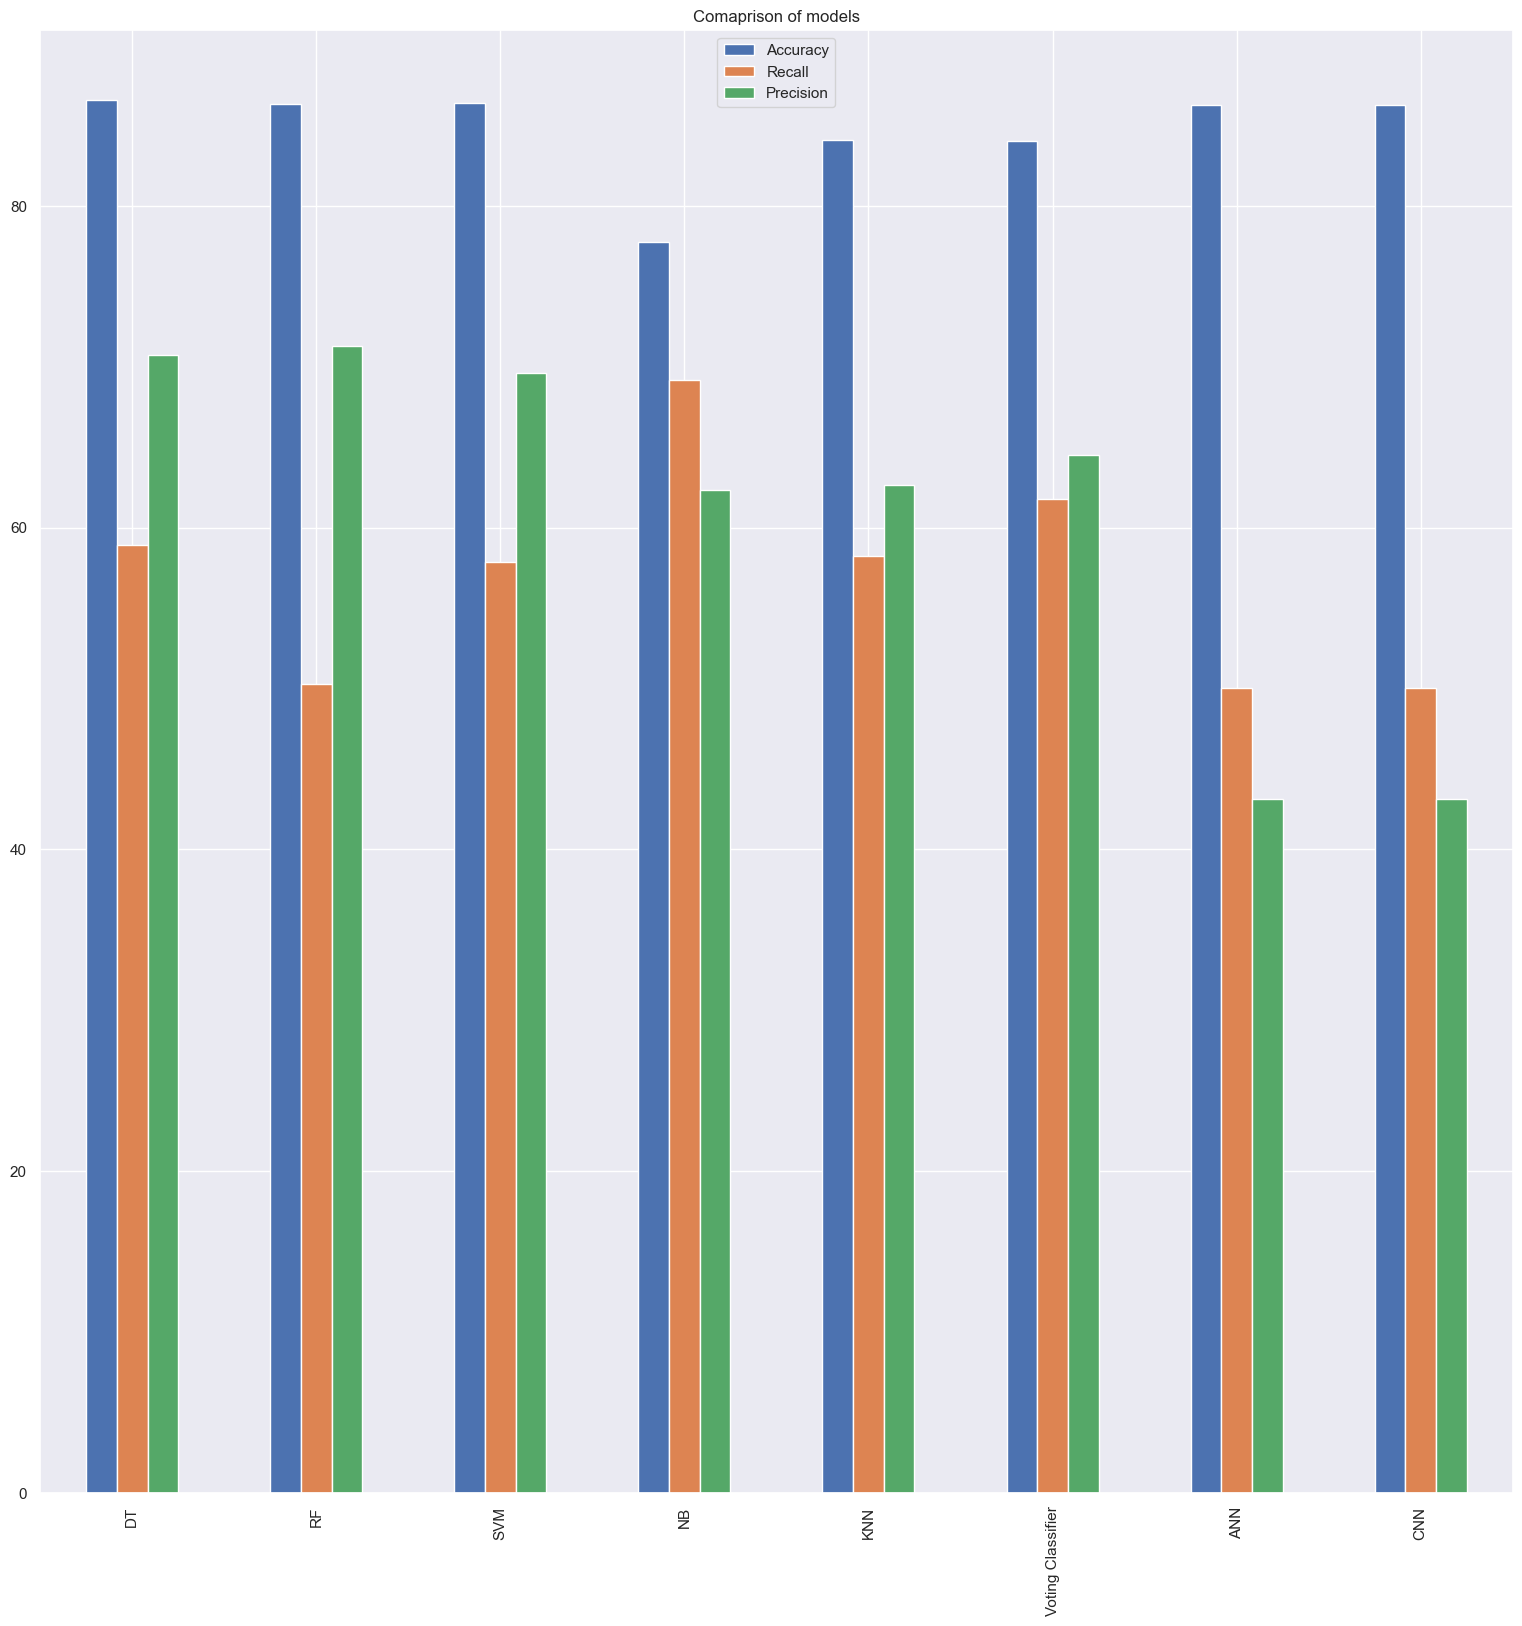

In [60]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

array([<Axes: title={'center': 'Accuracy'}>,
       <Axes: title={'center': 'Recall'}>,
       <Axes: title={'center': 'Precision'}>], dtype=object)

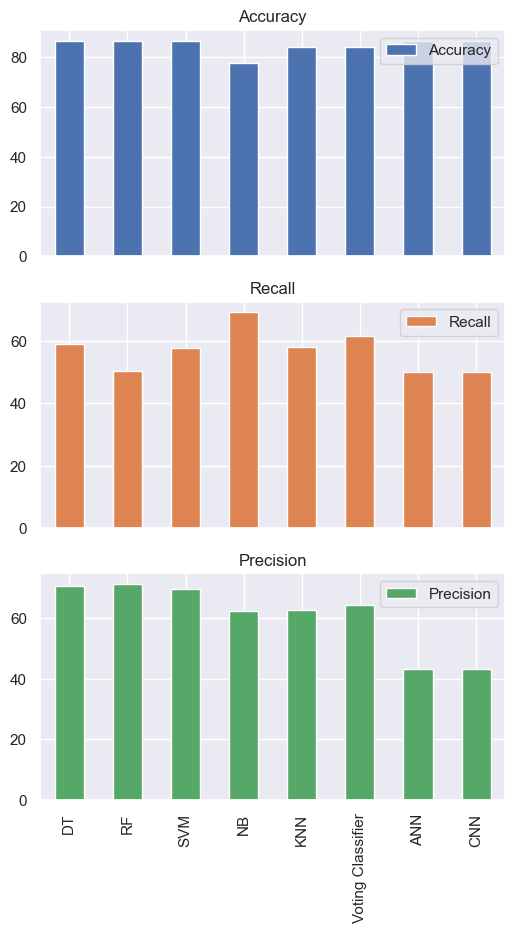

In [61]:
results.plot(subplots=True,kind ='bar',figsize=(6,10))

# Saving Model

In [63]:
import joblib
filename = 'model.sav'
joblib.dump(RF, filename)

['model.sav']